In [6]:
import monti
import sys
import os

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import pickle
import importlib

import matplotlib as mpl
import matplotlib.pyplot as plt

# set project parameters
metadir='metadata'              # path to metadata such as mirna-gene target file, promoter methylation probes file
ddir='data'
odir='./out'             # output directory

# create output direcotry
monti.make_env(odir) # create output dir


In [2]:
# gene expression data
mrna_df=pd.read_csv('%s/omics_gene_mat.txt'%(ddir), header=0)
mrna_df

,ID,TCGA-A6-2672,TCGA-A6-3809,TCGA-A6-5661,TCGA-A6-5665,TCGA-A6-6653,TCGA-A6-6780,TCGA-AA-3492,TCGA-AA-3713,TCGA-AD-5900,...,TCGA-F5-6813,TCGA-F5-6864,TCGA-G4-6297,TCGA-G4-6302,TCGA-G4-6310,TCGA-G4-6311,TCGA-G4-6314,TCGA-G4-6627,TCGA-G5-6572,TCGA-NH-A50V
0,ENSG00000078237,110401.035821,229114.170428,35151.127880,124802.381456,103611.773339,290031.453338,170634.872215,55397.296453,72444.215132,...,120431.166887,111181.479363,143777.466036,107683.404593,62363.410574,118619.205619,137123.430933,233644.779886,59163.471695,124297.706478
1,ENSG00000146083,357042.207722,282965.214392,304678.123387,302038.713978,355184.598513,186884.517162,183503.375005,421782.715171,271248.648279,...,478390.867083,480510.132038,444977.892233,251259.920060,370879.916585,416314.697822,598013.104648,302838.183007,577164.964464,674501.236994
2,ENSG00000201788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000172137,10807.344671,10845.365233,0.000000,89370.060652,1349.882898,12060.571204,12279.504024,14550.895983,9018.415605,...,66477.967622,24555.075514,86363.751763,332448.180027,11551.456927,83038.250977,126339.175395,97461.684806,3577.365904,6793.140450
4,ENSG00000060642,83807.091313,82697.627826,170115.927945,85567.435696,71541.698104,84643.536840,162483.964155,133541.895047,133713.314617,...,106119.475389,114864.261701,78428.920267,104562.382194,135238.630745,120629.383393,131236.851308,97541.764081,130728.440487,134227.232886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14508,ENSG00000135094,60002.693998,160189.734866,46459.894884,54196.715536,30016.595162,36725.863634,81935.074570,112085.979919,41820.038346,...,28754.391784,56685.196615,94144.157482,127574.671111,9543.754022,62165.231826,39614.051104,107678.472768,23162.262652,73892.012366
14509,ENSG00000238244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14510,ENSG00000273233,31682.940177,6193.714618,0.000000,12579.945554,4047.272139,6026.746702,5454.354552,0.000000,1335.277497,...,0.000000,917.408047,0.000000,0.000000,0.000000,1317.293962,0.000000,0.000000,0.000000,2172.529237
14511,ENSG00000105063,370353.457362,385176.979002,227369.617735,251386.410708,742857.342406,115051.079754,628274.034603,572290.155116,407589.652874,...,428228.049455,342787.572704,519644.397593,377542.609397,337805.026858,500302.363688,455924.833658,372696.995693,229710.543562,683262.590115


In [3]:
# methylation expression data
meth_df=pd.read_csv('%s/omics_methylation_mat.txt'%(ddir), header=0)
meth_df

,ID,TCGA-A6-2672,TCGA-A6-3809,TCGA-A6-5661,TCGA-A6-5665,TCGA-A6-6653,TCGA-A6-6780,TCGA-AA-3492,TCGA-AA-3713,TCGA-AD-5900,...,TCGA-F5-6813,TCGA-F5-6864,TCGA-G4-6297,TCGA-G4-6302,TCGA-G4-6310,TCGA-G4-6311,TCGA-G4-6314,TCGA-G4-6627,TCGA-G5-6572,TCGA-NH-A50V
0,cg00000292,0.77295,0.83366,0.86521,0.86752,0.81879,0.85795,0.66727,0.72598,0.76862,...,0.76945,0.76998,0.58647,0.73207,0.80158,0.71891,0.80994,0.77379,0.62091,0.80095
1,cg00000957,0.92116,0.92543,0.93399,0.90648,0.94109,0.92939,0.91751,0.89436,0.92792,...,0.94059,0.90867,0.85961,0.89869,0.85067,0.91047,0.89637,0.88997,0.91874,0.93453
2,cg00001245,0.02759,0.02543,0.02749,0.02433,0.01489,0.04937,0.01415,0.02695,0.06416,...,0.01311,0.01081,0.01933,0.01491,0.01558,0.01382,0.01407,0.01939,0.01312,0.01938
3,cg00001261,0.69255,0.65990,0.78970,0.73060,0.87894,0.76775,0.73105,0.53450,0.65435,...,0.71875,0.67952,0.68468,0.51259,0.72008,0.69688,0.62100,0.58825,0.71258,0.67417
4,cg00001510,0.39243,0.30193,0.34799,0.41710,0.49936,0.37986,0.40858,0.25801,0.69048,...,0.33930,0.24070,0.34829,0.39579,0.22298,0.28036,0.34310,0.46719,0.49339,0.42388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62064,ch.X.68408155R,0.02354,0.02778,0.03582,0.02845,0.05399,0.05555,0.02906,0.04217,0.05199,...,0.06309,0.04818,0.02942,0.03352,0.03366,0.03078,0.02740,0.03595,0.05484,0.04412
62065,rs10774834,0.02074,0.96753,0.48758,0.03329,0.03351,0.55268,0.02056,0.46419,0.04450,...,0.48728,0.49675,0.96288,0.45725,0.04025,0.03118,0.03356,0.48285,0.02640,0.96733
62066,rs6546473,0.02127,0.01890,0.97035,0.02680,0.47412,0.02234,0.02183,0.43064,0.46602,...,0.46066,0.02185,0.03136,0.02024,0.91663,0.45915,0.53623,0.02060,0.02193,0.96097
62067,rs939290,0.96198,0.02405,0.55027,0.54586,0.03958,0.87051,0.54001,0.50477,0.94383,...,0.96300,0.45227,0.03177,0.49220,0.96092,0.69991,0.53117,0.50137,0.51895,0.96492


In [4]:
# mirna expression data
mir_df=pd.read_csv('%s/omics_mirna_mat.txt'%(ddir), header=0)
mir_df

,ID,TCGA-A6-2672,TCGA-A6-3809,TCGA-A6-5661,TCGA-A6-5665,TCGA-A6-6653,TCGA-A6-6780,TCGA-AA-3492,TCGA-AA-3713,TCGA-AD-5900,...,TCGA-F5-6813,TCGA-F5-6864,TCGA-G4-6297,TCGA-G4-6302,TCGA-G4-6310,TCGA-G4-6311,TCGA-G4-6314,TCGA-G4-6627,TCGA-G5-6572,TCGA-NH-A50V
0,hsa-let-7a-1,7167.498389,3329.021019,6134.637434,5010.243033,10149.119285,3309.138457,5794.210865,11001.305158,5947.926015,...,13512.020938,10615.213522,7386.611190,3147.074973,2356.278528,5814.019056,4076.455482,4366.972544,16590.373170,5431.393581
1,hsa-let-7a-2,7118.344348,3385.379975,6105.224789,4996.978674,10131.932704,3239.737762,5773.408787,10916.622652,5971.260574,...,13552.824334,10578.013066,7324.162998,3135.428080,2306.183842,5797.825627,4111.289565,4378.987601,16638.999118,5393.418131
2,hsa-let-7a-3,7243.027769,3477.603720,6180.332079,5022.033574,10183.669629,3268.347844,5678.135268,10979.479770,5949.251842,...,13495.605779,10676.140253,7361.054834,3157.756321,2397.597503,5822.983275,4099.264988,4388.916711,16784.415322,5423.557377
3,hsa-let-7b,11394.146473,12762.741607,8605.824859,6794.299273,11665.613619,3084.790087,7402.211511,14181.700722,8215.223121,...,8068.050683,7287.871968,10262.113403,3146.773240,3206.425576,8992.268506,4592.520565,3424.958711,15769.887243,3935.281394
4,hsa-let-7c,186.425692,170.357751,266.289485,215.177374,147.591983,151.831725,251.705146,175.476121,542.263328,...,1487.916919,879.141480,525.347989,772.376080,483.943922,357.701262,864.405914,428.370153,3491.527698,525.779152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,hsa-mir-9500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1877,hsa-mir-96,48.554601,2.561771,43.068516,56.005070,17.363763,22.378183,17.057704,3.928570,6.098805,...,22.746720,5.174867,8.656185,1.508665,12.615085,9.542556,14.751800,4.672522,19.696586,25.919752
1878,hsa-mir-98,34.767492,34.583904,42.018065,41.266894,74.770488,45.889439,41.604156,45.396807,34.206342,...,46.900454,32.318506,40.807729,27.638741,32.908918,61.592861,46.982625,26.032623,57.704843,34.509437
1879,hsa-mir-99a,83.322094,51.235414,115.024452,112.747049,22.324838,78.748544,60.326027,31.865067,119.987362,...,237.550802,305.219488,97.279031,124.615720,140.777038,88.196350,156.691392,123.654960,817.562215,193.041873


In [10]:
# load mRNA data
gene_gl=pd.read_csv('%s/omics_gene_mat.txt'%(ddir), header=0, index_col=0)
gene_gl.to_csv('%s/gene_gc.txt'%(odir))
gene_gl

,TCGA-A6-2672,TCGA-A6-3809,TCGA-A6-5661,TCGA-A6-5665,TCGA-A6-6653,TCGA-A6-6780,TCGA-AA-3492,TCGA-AA-3713,TCGA-AD-5900,TCGA-AD-6889,...,TCGA-F5-6813,TCGA-F5-6864,TCGA-G4-6297,TCGA-G4-6302,TCGA-G4-6310,TCGA-G4-6311,TCGA-G4-6314,TCGA-G4-6627,TCGA-G5-6572,TCGA-NH-A50V
ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000078237,110401.035821,229114.170428,35151.127880,124802.381456,103611.773339,290031.453338,170634.872215,55397.296453,72444.215132,97317.928135,...,120431.166887,111181.479363,143777.466036,107683.404593,62363.410574,118619.205619,137123.430933,233644.779886,59163.471695,124297.706478
ENSG00000146083,357042.207722,282965.214392,304678.123387,302038.713978,355184.598513,186884.517162,183503.375005,421782.715171,271248.648279,292782.843283,...,478390.867083,480510.132038,444977.892233,251259.920060,370879.916585,416314.697822,598013.104648,302838.183007,577164.964464,674501.236994
ENSG00000201788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000172137,10807.344671,10845.365233,0.000000,89370.060652,1349.882898,12060.571204,12279.504024,14550.895983,9018.415605,4293.960223,...,66477.967622,24555.075514,86363.751763,332448.180027,11551.456927,83038.250977,126339.175395,97461.684806,3577.365904,6793.140450
ENSG00000060642,83807.091313,82697.627826,170115.927945,85567.435696,71541.698104,84643.536840,162483.964155,133541.895047,133713.314617,81665.232258,...,106119.475389,114864.261701,78428.920267,104562.382194,135238.630745,120629.383393,131236.851308,97541.764081,130728.440487,134227.232886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000135094,60002.693998,160189.734866,46459.894884,54196.715536,30016.595162,36725.863634,81935.074570,112085.979919,41820.038346,19648.510601,...,28754.391784,56685.196615,94144.157482,127574.671111,9543.754022,62165.231826,39614.051104,107678.472768,23162.262652,73892.012366
ENSG00000238244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000273233,31682.940177,6193.714618,0.000000,12579.945554,4047.272139,6026.746702,5454.354552,0.000000,1335.277497,0.000000,...,0.000000,917.408047,0.000000,0.000000,0.000000,1317.293962,0.000000,0.000000,0.000000,2172.529237


In [7]:
# converting methylation data to gene-level
methylation_promoter_probes_file='%s/promoter_probes_illumina450.txt'%(metadir)
gid_tid_file='%s/gid_tid.txt'%(metadir)
methylation_gl=monti.make_methylation_gcentric('%s/omics_methylation_mat.txt'%(ddir), '%s/omics_gene_mat.txt'%(ddir), gid_tid_file, methylation_promoter_probes_file)
methylation_gl.to_csv('%s/methylation_gc.txt'%(odir))
methylation_gl

reading methylation data...
reading TSS promoter probe annotation...
converting methylation to gene level data...


,TCGA-A6-2672,TCGA-A6-3809,TCGA-A6-5661,TCGA-A6-5665,TCGA-A6-6653,TCGA-A6-6780,TCGA-AA-3492,TCGA-AA-3713,TCGA-AD-5900,TCGA-AD-6889,...,TCGA-F5-6813,TCGA-F5-6864,TCGA-G4-6297,TCGA-G4-6302,TCGA-G4-6310,TCGA-G4-6311,TCGA-G4-6314,TCGA-G4-6627,TCGA-G5-6572,TCGA-NH-A50V
ENSG00000078237,0.274110,0.22986,0.358540,0.298860,0.276720,0.278640,0.221810,0.266950,0.267730,0.375970,...,0.301770,0.292090,0.267260,0.469090,0.385930,0.363510,0.302900,0.383080,0.305390,0.256600
ENSG00000146083,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000201788,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000172137,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000060642,0.832103,0.85396,0.897070,0.871600,0.928627,0.857893,0.889567,0.790943,0.794420,0.882483,...,0.896203,0.868367,0.869650,0.813293,0.895847,0.865297,0.833000,0.808800,0.883243,0.847923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000135094,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000238244,0.828697,0.79058,0.945220,0.864827,0.928420,0.926283,0.904927,0.783390,0.814290,0.905567,...,0.936540,0.915967,0.899093,0.917113,0.920307,0.906827,0.891333,0.892313,0.931167,0.910160
ENSG00000273233,0.612860,0.41322,0.601250,0.410200,0.661610,0.585770,0.325970,0.568330,0.596690,0.742160,...,0.620150,0.488280,0.390530,0.566560,0.491180,0.391210,0.414620,0.553730,0.218600,0.571630
ENSG00000105063,0.600435,0.63591,0.879935,0.905830,0.836180,0.788375,0.897350,0.625820,0.873855,0.919220,...,0.891600,0.737305,0.844985,0.846920,0.897700,0.788975,0.754225,0.791315,0.912130,0.884940


In [8]:
# converting miRNA data to gene-level
mirna_gene_target_file='%s/mirna_gene_pairs.txt'%(metadir)
mirna_gl=monti.make_mir_gcentric('%s/omics_mirna_mat.txt'%(ddir), '%s/omics_gene_mat.txt'%(ddir), mirna_gene_target_file)
mirna_gl.to_csv('%s/mirna_gc.txt'%(odir))
mirna_gl

reading mirna file...
reading mirna gene target file...
converting miRNAs to gene level data...


,TCGA-A6-2672,TCGA-A6-3809,TCGA-A6-5661,TCGA-A6-5665,TCGA-A6-6653,TCGA-A6-6780,TCGA-AA-3492,TCGA-AA-3713,TCGA-AD-5900,TCGA-AD-6889,...,TCGA-F5-6813,TCGA-F5-6864,TCGA-G4-6297,TCGA-G4-6302,TCGA-G4-6310,TCGA-G4-6311,TCGA-G4-6314,TCGA-G4-6627,TCGA-G5-6572,TCGA-NH-A50V
ENSG00000078237,1.798319,2.561771,3.501505,3.930180,1.889933,3.304795,1.248125,1.164021,1.193244,1.354535,...,1.328846,2.148058,1.305298,1.146585,2.437698,3.951968,1.115682,1.223756,22.107367,1.255802
ENSG00000146083,1812.750079,1347.939696,1716.346025,1543.326554,2379.739111,1277.440185,1631.059749,2374.929613,1574.028689,1866.049383,...,2806.400083,1819.646625,1973.507128,984.821745,1255.630625,1807.201044,1632.748476,1258.354011,3522.896051,1853.797228
ENSG00000201788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000172137,2461.938088,2531.029447,2589.818428,2490.653540,2320.389298,3073.572668,2053.941730,3242.437867,2113.563022,1474.320759,...,1991.596533,1549.120712,2183.790593,1993.911873,3310.210553,2830.746192,2469.310884,2124.901745,2733.824640,3126.163186
ENSG00000060642,1344.775968,1311.341955,1441.919917,1396.401265,1250.348407,1645.126957,1078.171714,1703.641299,1252.567888,765.330939,...,1110.654874,813.886087,1142.719468,1108.318874,1715.377350,1516.061519,1338.288561,1177.915940,1414.033667,1594.952172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000135094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000238244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000273233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000105063,1864.931289,700.163953,1958.501384,1314.737439,1460.925864,3026.507666,893.969311,1026.611696,615.913029,1749.445106,...,750.612461,697.813668,926.160269,218.152944,373.836167,1009.595184,748.498911,323.186256,1382.684977,1235.200500


In [11]:
# create an multi-omics data object including all omics data
modata={'gene':gene_gl, 'methylation':methylation_gl, 'mirna':mirna_gl}

# load clinical features
label_data=pd.read_csv('%s/subtypes.txt'%(ddir), header=0)

# load list of genes to use for the analysis
genelist=pd.read_csv('%s/genelist.txt'%(metadir), header=0)

In [13]:
# split data into train and test data sets for cross validation
cv_n=10 # n cross validation
test_data_ratio=0.1
cv_data=monti.split_data(modata, label_data, genelist, odir, cv_n, test_data_ratio)

generating cross validation data set 0...
generating cross validation data set 1...
generating cross validation data set 2...
generating cross validation data set 3...
generating cross validation data set 4...
generating cross validation data set 5...
generating cross validation data set 6...
generating cross validation data set 7...
generating cross validation data set 8...
generating cross validation data set 9...


In [15]:
# set parameters
rank=100		# number of ranks (or features) to decompose the tensor
maxiter=100	# number of maximum iterations while decomposing the tensor (higher the better)
tol_val=10e-8	# the tolerance value when decomposition does not change under @tol_val (smaller the better)
alpha=0.01  # the penalty value for feature selection (L1 regression). Higher value penalizes features more, causing less number of features to be selected

# perform n cross validation
for i in range(cv_n):
	print('cv: ', i)
	tres=monti.decompose_tensor(cv_data[i].train_data, rank, maxiter, tol_val)
	np.save('%s/cvs/cv_%d/out/components/r%d_td.npy'%(odir, i, rank), tres)
	O, G, P=tres
	sample_info=monti.get_sample_info(modata.keys(), cv_data[i].train_labels, genelist)
	feature_samples, feature_labels=monti.select_features(P, alpha, sample_info, odir, i)
	feature_genes, gene_labels=monti.get_featuregenes(G, cv_data[i], sample_info, odir, i, rank)
	predres=monti.measure_accuracy(cv_data[i], feature_genes, sample_info, odir, i)
	#
	# store results to cross validation data sets
	cv_data[i].sample_info=sample_info
	cv_data[i].feature_samples=feature_samples
	cv_data[i].feature_labels=feature_labels
	cv_data[i].feature_genes=feature_genes
	cv_data[i].gene_labels=gene_labels
	cv_data[i].predres=predres

cv:  0
Selected features:	30

Selected genes:	3944
  - CMS1: 946 genes
  - CMS2: 1168 genes
  - CMS3: 761 genes
  - CMS4: 1772 genes
cv:  1
Selected features:	26

Selected genes:	3417
  - CMS1: 1188 genes
  - CMS2: 1587 genes
  - CMS3: 1832 genes
  - CMS4: 707 genes
cv:  2
Selected features:	24

Selected genes:	3126
  - CMS1: 879 genes
  - CMS2: 1419 genes
  - CMS3: 557 genes
  - CMS4: 1026 genes
cv:  3
Selected features:	25

Selected genes:	3181
  - CMS1: 1025 genes
  - CMS2: 561 genes
  - CMS3: 954 genes
  - CMS4: 1418 genes
cv:  4
Selected features:	29

Selected genes:	3667
  - CMS1: 1085 genes
  - CMS2: 1008 genes
  - CMS3: 779 genes
  - CMS4: 1636 genes
cv:  5
Selected features:	34

Selected genes:	5492
  - CMS1: 1833 genes
  - CMS2: 2096 genes
  - CMS3: 924 genes
  - CMS4: 2326 genes
cv:  6
Selected features:	33

Selected genes:	4610
  - CMS1: 711 genes
  - CMS2: 2384 genes
  - CMS3: 923 genes
  - CMS4: 978 genes
cv:  7
Selected features:	29

Selected genes:	5731
  - CMS1: 1707 g

In [27]:
# let's observe the results of cross validation data set #5
cvidx=5
print(cv_data[cvidx].predres)

              precision    recall  f1-score   support

        CMS1       1.00      1.00      1.00         4
        CMS2       0.92      0.92      0.92        13
        CMS3       1.00      0.75      0.86         4
        CMS4       0.91      1.00      0.95        10

    accuracy                           0.94        31
   macro avg       0.96      0.92      0.93        31
weighted avg       0.94      0.94      0.93        31



In [28]:
# load the decomposition result of cv5
O, G, P=np.load('%s/cvs/cv_%d/out/components/r%d_td.npy'%(odir, cvidx, rank), allow_pickle=True)

print('O:', O.shape) # the omics component
print('P:', P.shape) # the sample (patient) component
print('G:', G.shape) # the gene component

O: (3, 100)
P: (286, 100)
G: (14513, 100)


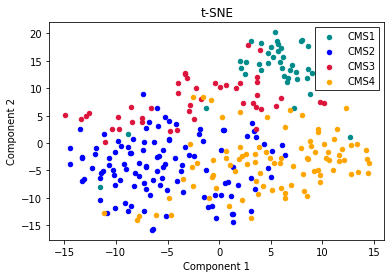

In [41]:
# the sample t-SNE plot
p=monti.plot_sample_features(P, cv_data[cvidx].feature_labels, cv_data[cvidx].train_labels, cv_data[cvidx].sample_info)
p.show()

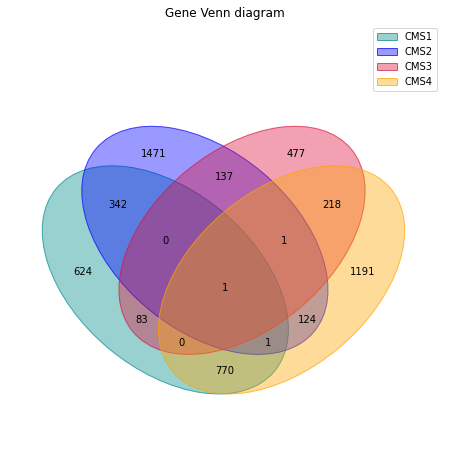

In [30]:
# The group gene Venn diagram
p=monti.plot_venn(cv_data[cvidx].gene_labels, cv_data[cvidx].sample_info)
plt.show()

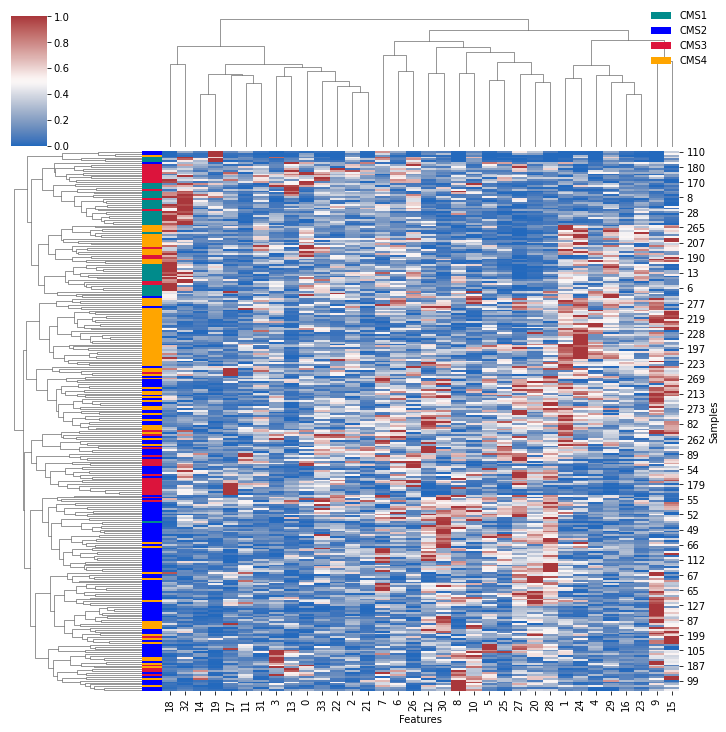

In [31]:
# The sample heatmap (P component)
p=monti.plot_sample_hmap(P, cv_data[cvidx].feature_samples, cv_data[cvidx].sample_info)
p.show()

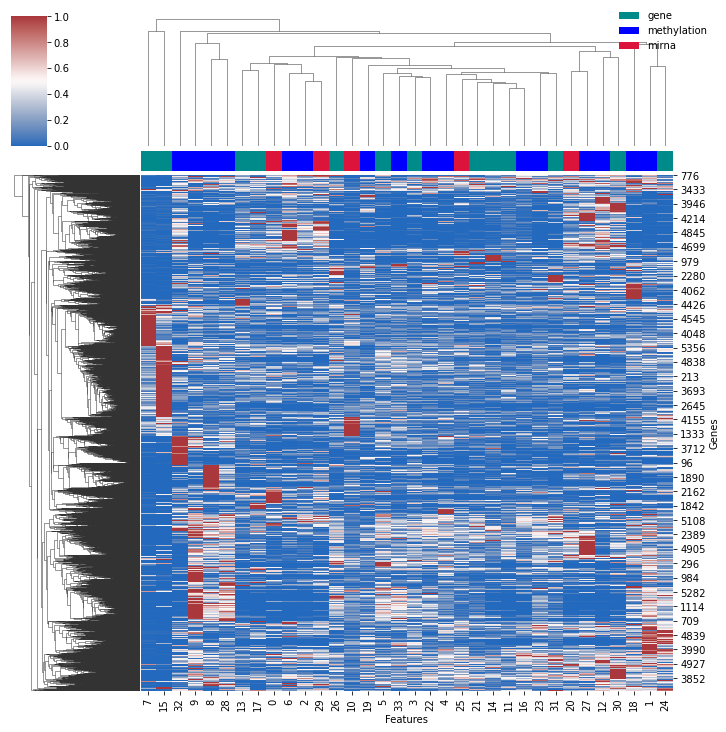

In [32]:
# plot gene heatmap (G component)
p=monti.plot_gene_hmap(G, O, cv_data[cvidx].feature_samples, cv_data[cvidx].feature_genes, cv_data[cvidx].sample_info)
p.show()

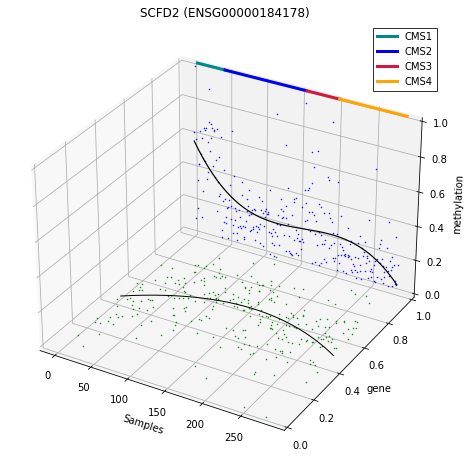

In [40]:
gidx=cv_data[cvidx].feature_genes[6]
monti.plot_gene(modata, cv_data[cvidx], gidx, cv_data[cvidx].sample_info)